# KNN Predictions on the Iris Dataset 

This notebook is also hosted at: 

* http://www.eggie5.com/62-knn-predictions-on-the-iris-dataset
* http://github.com

These are my notes from the "Intro to Python and basic Sci-kit Learn" Seminar on 10/8/2015 @ UCSD

This Notebook will demonstrate the basics of using the k-Nearest Neighbors algorithm (KNN) to make predictions. The dataset is called Iris, and is a collection of flower measurements from which we can train our model to make predictions.

## The Dataset

The iris dataset is included int the Sci-kit library. It is a collection 4 dimensional vectors that map flower measurements to a flower species.

In [94]:
from sklearn.datasets import load_iris
iris = load_iris()

In [95]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

As you can see from the above output, that the dataset is indeed a 4D vector with a length and width measurement for the flower sepal and petal. Lets preview the data for these measurements:

In [96]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

Now each of these vectors maps directly to a flower species, described in `target`:

In [97]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The numbers in the output above are ids. The dataset provides a lookup table to map the ids to a string flower name:

In [98]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

So, id `2` maps to:

In [99]:
iris.target_names[2]

'virginica'

## The Model

For this demonstration we will use the KNN algorithm to model a flower species prediction engine. I can't get too deep into the details of the theory behind KNN, but I can try to describe it intuitively below.

### KNN Intuition

For simplicity, let's image our dataset is only a 2 dimensional vector instead of 4, (remove width measurements) e.g:

```
['sepal length (cm)',
 'petal length (cm)']
```

Now we have a collection of (`sepal length` `petal length`) pairs that map to `iris.target`

If we scatter plot this we'd have something like:


![](https://upload.wikimedia.org/wikipedia/commons/c/cc/Data3classes.png)


Where the x axis is `sepal length (cm)`, the y axis is `petal length (cm)` and the color (red/green/blue) corresponds to the `species id`.

Now, from intuition, you could say if you picked a point on the scatter plot and it is surrounded by a majority of blue dots then it can be inferred from the data with a probability degree of certanity that that point is also classified as a blue species. This is in essence what KNN does. It will build a `boundary` around a clustering of common points. See the image below:

![](https://upload.wikimedia.org/wikipedia/commons/8/8c/Map5NN.png)

Also, keep in mind that the example above is presented w/ a 2D dataset while ours is 4D, the theory holds.

Now let's test this out and see if we can make some predictions!

## Experiment

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
knn = KNeighborsClassifier(n_neighbors=1)

In [102]:
X = iris.data
Y = iris.target
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

So what we are saying above, is that we have a vector `X` with corresponding output in vector `Y`, now train the model w/ these inputs so that we will have a boundary map like the image above that will allow us to make arbitrary predictions.

So for example, say I have a flower w/ these measurements: 

```
sepal length (cm): 3
sepal width (cm): 5
petal length (cm): 4
petal width (cm): 2
```

If I convert that into a vector and feed it though the model `knn` it should make a prediction about `species`.

In [103]:
test_input = [3,5,4,2]

In [104]:
species_id = knn.predict(test_input)
print iris.target_names[species_id]

['virginica']


So, we can say w/ a certain degree of certainty that this random sample `test_input` is of type `virginica`

### Measuring Error

Now I keep using the language "with a certain degree of certainty", etc, in which I'm trying to convey that this an other machine learning/data mining models are only approximations and a degree of error exists. Let's measure the error of our KNN.

#### Cross Validation w/ Test Train Split

One way we can measure the accuracy of our model is to test it against the data we trained it with. Sci-kit has a convenient function to help us with that.

In [105]:
from sklearn.cross_validation import train_test_split

We're basically feeding in input for which we KNOW the correct output to measure the error in our model.

In order to do this we will use the `train_test_split` function which will divide our dataset into 2 parts. The first part will be used to train the model and the second part will be used to test the model.

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=4)
actual = Y_test

Now train the model w/ the new data:

In [114]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
expected = knn.predict(X_test) #predictions

Now what we could do is to feed in all all the test data in `X_test` and compare the results to the known answers in `Y_test` and then measure the error, which is the difference between the expected answer and the actual answer. Then we could compute some type of error function, such as mean-squared-error, etc.

But even more convenient, Sci-kit has a metrics library that will automate a lot of this:

In [115]:
import sklearn.metrics
score_1 = metrics.accuracy_score(actual, expected)
score_1

0.94999999999999996

##### Lower Error Rate

Our model has an accuracy of .94 where 1 is the max. I don't have anything relative to compare it to but it seems pretty accurate. There are lots of settings in the KNN model, such as the K value, that we can adjust to get a higher acceptance rate. If you noticed, the first time we instantiated `KNeighborsClassifier` we chose a setting of `n_neighbors=1` with no discussion. Lets iterate 1-26 and see if we can't lower the error rate:

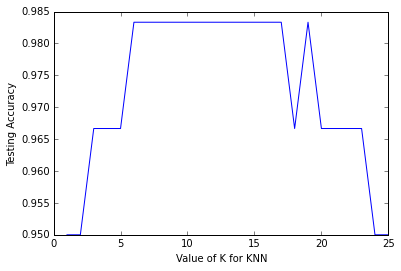

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline
    
scores = []
k_range = range(1,26)
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    actual = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, actual))

plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.plot(k_range, scores)

It looks like if we choose a K value of 20 our model should be the most accurate. Lets see if we adjust our K can we get a higher score than the last score `score_1` of: `0.94999999999999996`

In [110]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, Y_train)
expected = knn.predict(X_test)
score_2 = metrics.accuracy_score(actual, expected)
score_2

0.98333333333333328

In [111]:
(score_1-score_2)/score_1

-0.035087719298245605

It's only a 1.7% decrease in error, but considering it's so close to 1 we should be happy that our model is predicting flowers at a reasonable error rate.